1. In the first layer, the number of boxes (nodes/neurons), depend upon the number of feature columns that we have.
2. In the last layer, the number of boxes (nodes/neurons), depend upon the number of target columns that we have.

First Layer: Input Layer
Middle Layers: Hidden Layers
Last Layer: Output Layer

1. We can only have one input layer, the number of boxes (nodes/neurons), depend upon the number of feature columns that we have.
2. We can have any number of hidden layers, and we can have any number of boxes in those hidden layers.
3. We can only have one output layer, the number of boxes (nodes/neurons), depend upon the number of target columns that we have

#### Requires two algorithms
1. Forward Propagation Algorithm
2. 

# Coding the forward propagation algorithm

Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year.

In [2]:
import numpy as np

In [2]:
input_data = np.array([3,5])

In [3]:
weights = {"node_1":np.array([2,4]), "node_2":np.array([4,-5]), "output":np.array([2,7])}

In [4]:
(input_data*weights["node_1"]).sum()

26

In [5]:
node_1_hidden_1 = (input_data*weights["node_1"]).sum()

In [6]:
(input_data*weights["node_2"]).sum()

-13

In [7]:
node_2_hidden_1 = (input_data*weights["node_2"]).sum()

In [8]:
input_hidden_1 = np.array([node_1_hidden_1,node_2_hidden_1])

In [9]:
(input_hidden_1*weights["output"]).sum()

-39

In [10]:
output = (input_hidden_1*weights["output"]).sum()

In [11]:
output

-39

# The Rectified Linear Activation Function

You will need an activation function on a data only when you have a non-linear relationship between feature and target.

1. It converts negative values to zero.
2. It keeps positive values as it is.

In [5]:
def relu(x):
    return max(0, x)

In [13]:
relu(-6)

0

In [14]:
relu(6)

6

In [15]:
import numpy as np

In [16]:
input_data = np.array([3,5])
weights = {"node_1":np.array([2,4]), "node_2":np.array([4,-5]), "output":np.array([2,7])}

In [17]:
node_1_hidden_1 = (input_data*weights["node_1"]).sum()
node_1_hidden_1 = relu(node_1_hidden_1)
node_2_hidden_1 = (input_data*weights["node_2"]).sum()
node_2_hidden_1 = relu(node_2_hidden_1)
input_hidden_1 = np.array([node_1_hidden_1,node_2_hidden_1])
output = (input_hidden_1*weights["output"]).sum()
output = relu(output)

In [18]:
output

52

# Applying the network to many observations/rows of data

In [19]:
input_data = [np.array([3,5]), np.array([1,-1]), np.array([0,0]), np.array([8,4])]

In [21]:
weights = {"node_1":np.array([2,4]), "node_2":np.array([4,-5]), "output":np.array([2,7])}

In [22]:
outputs = []

In [23]:
for row in input_data:
    node_1_hidden_1 = (row*weights["node_1"]).sum()
    node_1_hidden_1 = relu(node_1_hidden_1)
    node_2_hidden_1 = (row*weights["node_2"]).sum()
    node_2_hidden_1 = relu(node_2_hidden_1)
    input_hidden_1 = np.array([node_1_hidden_1,node_2_hidden_1])
    output = (input_hidden_1*weights["output"]).sum()
    output = relu(output)
    outputs.append(output)

In [24]:
outputs

[52, 63, 0, 148]

# Multi-layer neural networks

In [3]:
weights = {"node_1_1": np.array([2, 4]),
          "node_1_2": np.array([4, -5]),
          "node_2_1": np.array([-1, 2]),
          "node_2_2": np.array([1, 2]),
          "output": np.array([2, 7])}

In [17]:
input_data = np.array([3, 5])

In [18]:
def predict_network(input_data, weights):
    node_1_hidden_1 = (input_data*weights["node_1_1"]).sum()
    node_1_hidden_1 = relu(node_1_hidden_1)
    
    node_2_hidden_1 = (input_data*weights["node_1_2"]).sum()
    node_2_hidden_1 = relu(node_2_hidden_1)
    
    input_hidden_1 = np.array([node_1_hidden_1, node_2_hidden_1])
    
    node_1_hidden_2 = (input_hidden_1*weights["node_2_1"]).sum()
    node_1_hidden_2 = relu(node_1_hidden_2)
    
    node_2_hidden_2 = (input_hidden_1*weights["node_2_2"]).sum()
    node_2_hidden_2 = relu(node_2_hidden_2)
    
    input_hidden_2 = np.array([node_1_hidden_2, node_2_hidden_2])
    
    output = (input_hidden_2*weights["output"]).sum()
    output = relu(output)
    
    return output

In [19]:
predict_network(input_data, weights)

182

### Formulae

Forward Propagation - Predicted value = input_data*weights.sum()

Error = |Predicted Value - Actual Value|

Backward Propagation - New weight = Original weight - Learning_rate*slope - Adam Optimizer

Slope = 2 * Input_weight * Error

# Build a Neural Network

1. Specify the architecture of the neural network (type of the model, type of each layer, how many layers, how many nodes in each layer)
2. Compile the model(loss_function, optimize_weights)
3. Train the model
4. Use the trained model for prediction.

Types of models - Sequential(to be used here),

Sequential Model:
    All the layers in this model are connected only to the layer coming directly after it.

Dense layer:
    All the neurons in that dense layer are connected to all the other neurons in the previous layers.

### Getting the data

In [23]:
import pandas as pd

In [24]:
df = pd.read_csv("~/Downloads/hourly_changes.csv")

In [25]:
df

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
529,11.36,0,18,5,29,0,0,0,0,0
530,6.10,0,12,33,51,1,1,0,0,0
531,23.25,1,17,25,48,1,1,0,0,0
532,19.88,1,12,13,31,0,1,1,0,0


In [26]:
target = df["wage_per_hour"]

In [28]:
features = df.drop("wage_per_hour", axis="columns")

In [29]:
features

,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,0,8,21,35,1,1,0,1,0
1,0,9,42,57,1,1,0,1,0
2,0,12,1,19,0,0,0,1,0
3,0,12,4,22,0,0,0,0,0
4,0,12,17,35,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
529,0,18,5,29,0,0,0,0,0
530,0,12,33,51,1,1,0,0,0
531,1,17,25,48,1,1,0,0,0
532,1,12,13,31,0,1,1,0,0


### Regression Model

Infinite set of possibilities for target column

## Step 1:

In [43]:
from keras.layers import Dense
from keras.models import Sequential
from keras.losses import MeanSquaredError

In [44]:
model = Sequential()
model.add(Dense(50, activation="relu", input_shape=(9,)))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))

## Step 2: Compile the model

In [45]:
model.compile(optimizer="adam", loss=MeanSquaredError())

## Step 3: Train the model

In [46]:
# fit() function is used for scannig the data and training the model
# epochs = number of iterations of Forward and Backward Propagations
model.fit(features, target, epochs=5)

Epoch 1/5
17/17 [==============================] - 1s 1ms/step - loss: 46.2515
Epoch 2/5
17/17 [==============================] - 0s 2ms/step - loss: 31.1127
Epoch 3/5
17/17 [==============================] - 0s 2ms/step - loss: 19.6575
Epoch 4/5
17/17 [==============================] - 0s 2ms/step - loss: 19.4802
Epoch 5/5
17/17 [==============================] - 0s 2ms/step - loss: 20.9302


## Step 4:

In [48]:
features

,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,0,8,21,35,1,1,0,1,0
1,0,9,42,57,1,1,0,1,0
2,0,12,1,19,0,0,0,1,0
3,0,12,4,22,0,0,0,0,0
4,0,12,17,35,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
529,0,18,5,29,0,0,0,0,0
530,0,12,33,51,1,1,0,0,0
531,1,17,25,48,1,1,0,0,0
532,1,12,13,31,0,1,1,0,0


In [50]:
data = pd.DataFrame({"union":[0],"education_yrs":[4],"experience_yrs":[0],"age":[20],"female":[0],"marr":[0],"south":[0],"manufacturing":[0],"construction":[0]})

In [51]:
data

,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,0,4,0,20,0,0,0,0,0


In [52]:
model.predict(data)

array([[5.618638]], dtype=float32)

### Classification Model

Finite set of possibilities for target column

Changes required to make a regression model into classification model.

1. Increase the number of neurons in the output layer (Increase the number of target columns)
2. Convert the values in the neurons of the output layer to probability values (activation function that converts the values to probability).

Activation functions: 
    Sigmoid - 1/(1+ e^-x)
    Drawback - sum of probabilities do not add up to 1. Hence not reliable for prediction.
    
    Softmax - e^x/Sum(e^x)

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("~/Documents/Verzeo/TitanicVerzeoAI.csv")

In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df.shape

(891, 12)

Replace lesser null values with aggregated values.

Aggregation Methods - 
1. Mean - Continuous Data (Infinite set of possibilites), Numeric, No outliers
2. Median - Continuous Data (Infinite set of possibilities), Numeric, Outliers (Any value that is below 5th percentile or above 95th percentile
3. Mode - Categorical Data (Finite set of possibilities), Numeric as well as non-numeric

In [30]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [31]:
import numpy as np

In [32]:
np.percentile(df[["Age"]].dropna(),5)

4.0

In [33]:
np.percentile(df[["Age"]].dropna(),95)

56.0

In [34]:
df[(df["Age"]<4.0) | (df["Age"]>56.0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
824,825,0,3,"Panula, Master. Urho Abraham",male,2.00,4,1,3101295,39.6875,NaN,S
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,NaN
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [35]:
df["Age"].fillna(df["Age"].median(),inplace=True)

In [36]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
df.shape

(891, 12)

In [38]:
df = df.drop("Cabin",axis="columns")

In [39]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [40]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [41]:
df = df.drop("Embarked",axis="columns")

In [42]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000


In [43]:
y = df["Survived"]

In [45]:
X = df.drop("Survived", axis="columns")

In [46]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000


In [47]:
X.drop(["PassengerId","Name","Ticket"],axis="columns",inplace=True)

In [48]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,28.0,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [49]:
X = pd.get_dummies(X, columns=["Sex"])

In [50]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1
887,1,19.0,0,0,30.0000,1,0
888,3,28.0,1,2,23.4500,1,0
889,1,26.0,0,0,30.0000,0,1


Loss function to be used - Categorical cross entropy

LF = -sum(Y_actual(i) x ln(Y_predicted(i)))

### Working with images

In [51]:
import tensorflow as tf

In [53]:
(train_features, train_target),(test_features, test_target)=tf.keras.datasets.fashion_mnist.load_data()

Tshirt/Top - 0
Trouser    - 1
Pullover   - 2
Dress      - 3
Coat       - 4
Sandal     - 5
Shirt      - 6
Sneaker    - 7
Bag        - 8
Ankle Boot - 9

In [54]:
train_target

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [55]:
import matplotlib.pyplot as plt

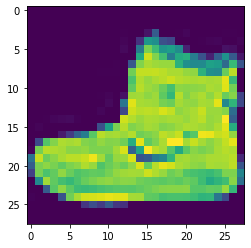

In [56]:
plt.imshow(train_features[0])

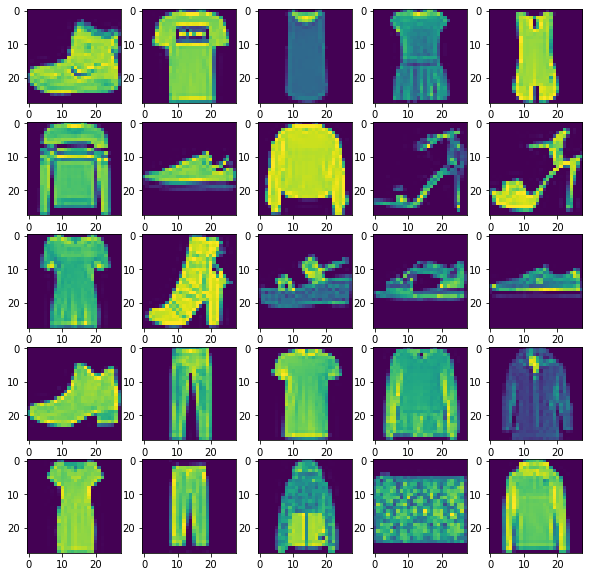

In [59]:
plt.figure(figsize=(10,10))
for index in list(range(25)):
    plt.subplot(5,5,index+1)
    plt.imshow(train_features[index])

In [62]:
from tensorflow.keras.utils import to_categorical

In [63]:
train_target = to_categorical(train_target)

In [64]:
train_target.shape

(60000, 10)

In [67]:
train_features.ndim

3

In [68]:
import numpy as np

In [73]:
a = np.array([
    1,2,3,
    4,5,6
])

In [74]:
a.ndim

1

## Step 1: Specify the architecture

In [75]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [76]:
model = Sequential()

In [77]:
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

## Step 2: Compile the model

In [80]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

## Step 3: Fit/Scan/Train the Model

In [81]:
model.fit(train_features, train_target, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 2ms/step - loss: 11.5747 - accuracy: 0.6981
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6594 - accuracy: 0.7796
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.8012: 0s - loss:
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5254 - accuracy: 0.8201
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5209 - accuracy: 0.8233
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4872 - accuracy: 0.8326
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4650 - accuracy: 0.8400
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4626 - accuracy: 0.8422
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4569 - accuracy: 0.8465
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step

## Test the Model by making predictions

In [82]:
predictions = model.predict(test_features)

In [83]:
predictions

array([[4.98304421e-26, 1.87217128e-17, 0.00000000e+00, ...,
        7.14581134e-03, 1.51845241e-16, 9.83668625e-01],
       [2.65834127e-02, 2.25373469e-06, 9.36668694e-01, ...,
        6.20516761e-30, 7.24636720e-06, 8.94077385e-27],
       [1.89086878e-13, 1.00000000e+00, 1.78294792e-11, ...,
        0.00000000e+00, 6.98666259e-17, 0.00000000e+00],
       ...,
       [1.14975933e-06, 3.34784851e-18, 1.76517884e-10, ...,
        0.00000000e+00, 9.99998808e-01, 1.42865145e-36],
       [0.00000000e+00, 1.00000000e+00, 3.50725589e-21, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.53841369e-22, 4.46364650e-18, 7.82046548e-36, ...,
        6.79754615e-02, 8.30986664e-06, 6.15097396e-03]], dtype=float32)

In [84]:
predictions[0]

array([4.9830442e-26, 1.8721713e-17, 0.0000000e+00, 2.0028008e-32,
       0.0000000e+00, 9.1855600e-03, 3.9116641e-36, 7.1458113e-03,
       1.5184524e-16, 9.8366863e-01], dtype=float32)

In [85]:
np.argmax(predictions[0])

9

In [86]:
test_target[0]

9

Predicted and Actual matches for the first image!